# Data import


In [2]:
#Local import
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')
path = '/content/drive/MyDrive/ADD_Datasets/'
file_name = 'mnist_small.csv'
df = pd.read_csv(path + file_name,header=None)

columns = ['class'] + [f'pixel{i}' for i in range(1,785)]
df.columns = columns

df_train, df_test = train_test_split(df, test_size=0.2,
                                     random_state=42,stratify=df['class']
                                     )

print(df_train.shape)
df_train.head(10)

Mounted at /content/drive
(8000, 785)


,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3155,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5726,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
681,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3051,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5655,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8680,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7320,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3200,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = df_train.iloc[:,1:785]
y_train = df_train.iloc[:,0]
X_test = df_test.iloc[:,1:785]
y_test = df_test.iloc[:,0]

print(X_train.shape)
print(X_test.shape)

(8000, 784)
(2000, 784)




#PCA alghoritm

In [5]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1

In [6]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
print(f"Number of dimensions after reduction (90% variance): {d}")

Number of dimensions after reduction (90% variance): 84


In [7]:
pca.n_components_

np.int64(84)

In [8]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.900711892776197)

In [9]:
pca = PCA(n_components = 84)
X_reduced_np = pca.fit_transform(X_train)
X_recovered_np = pca.inverse_transform(X_reduced)
X_reduced = pd.DataFrame(X_reduced_np)
X_recovered = pd.DataFrame(X_recovered_np)

#  Origin data visualization


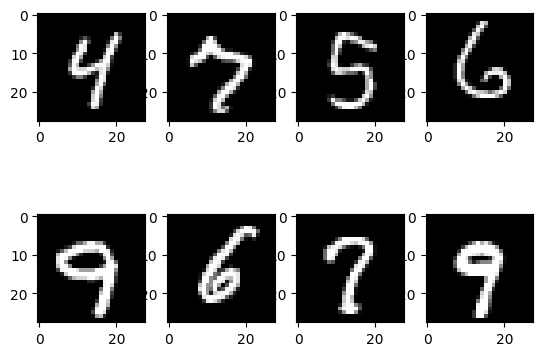

In [10]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(8):
     # define subplot
    plt.subplot(240+1+i)
    # plot raw pixel data
    ith_image = X_train.iloc[i,:]
    ith_image_arr = ith_image.to_numpy()
    ith_image= ith_image_arr.reshape(28,28)
    plt.imshow(ith_image, cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# Reduced data

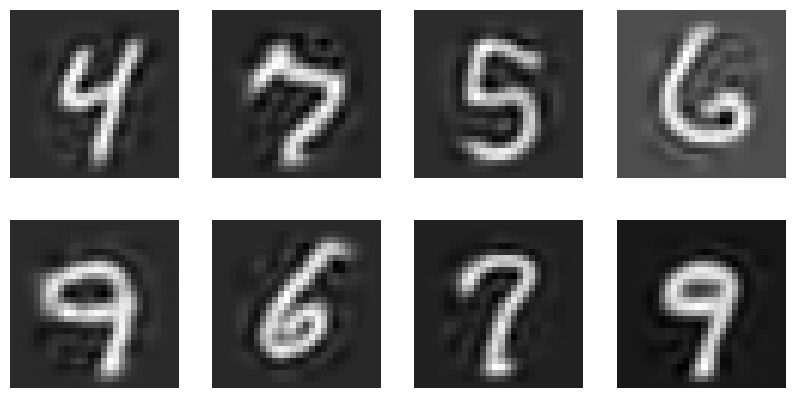

In [11]:

plt.figure(figsize=(10, 5))

for i in range(8):
    plt.subplot(2, 4, i + 1)


    ith_reduced = np.array(X_reduced)[i].reshape(1, -1)


    ith_recovered = pca.inverse_transform(ith_reduced)

    ith_image = ith_recovered.reshape(28, 28)

    plt.imshow(ith_image, cmap='gray')
    plt.axis('off')

plt.show()

#DT original data

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time

tree_clf = DecisionTreeClassifier()
t0 = time.time()
tree_clf.fit(X_train, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

Training took 2.24s


In [13]:
from sklearn.metrics import accuracy_score

# Accuracy
y_pred = tree_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 81.20%


#DT reduced data

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
X_train_reduced = pca.fit_transform(X_train)


X_test_reduced = pca.transform(X_test)


print(f"Number of dimensions after reduction (90% variance):", pca.n_components_)


Number of dimensions after reduction (90% variance): 84


In [18]:
tree_clf2 = DecisionTreeClassifier()
t0 = time.time()
tree_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

Training took 5.35s


In [19]:
X_test_reduced = pca.transform(X_test)

y_pred = tree_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.778

# Logistic Regression original data

In [20]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

In [21]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 10.57s


In [22]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

In [24]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [25]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 1.41s


In [26]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9025

# kNN original and reduced

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# --- kNN on Original Data ---
knn_orig = KNeighborsClassifier()

t0_knn_orig = time.time()
knn_orig.fit(X_train, y_train)
y_pred_knn_orig = knn_orig.predict(X_test)
t1_knn_orig = time.time()

# Time counter
time_knn_orig = t1_knn_orig - t0_knn_orig

# Accuracy
acc_knn_orig = accuracy_score(y_test, y_pred_knn_orig)

# Report
print(f"kNN original - time: {time_knn_orig:.2f}s")
print(f"kNN original - accuracy: {acc_knn_orig * 100:.2f}%")


# --- kNN on PCA Data ---
knn_pca = KNeighborsClassifier()

t0_knn_pca = time.time()
knn_pca.fit(X_train_reduced, y_train)
y_pred_knn_pca = knn_pca.predict(X_test_reduced)
t1_knn_pca = time.time()

# Time counter pca
time_knn_pca = t1_knn_pca - t0_knn_pca

# Accuracy pca
acc_knn_pca = accuracy_score(y_test, y_pred_knn_pca)

# Report
print(f"kNN PCA - time: {time_knn_pca:.2f}s")
print(f"kNN PCA - accuracy: {acc_knn_pca * 100:.2f}%")

# Summary of improvement
print(f"\nSpeedup achieved with PCA: {time_knn_orig / time_knn_pca:.1f}x")

kNN original - time: 1.08s
kNN original - accuracy: 94.75%
kNN PCA - time: 0.15s
kNN PCA - accuracy: 95.40%

Speedup achieved with PCA: 7.0x
